In [2]:
from dataset import EnergyDensityDataset

dataset = EnergyDensityDataset('dE_data-5.02tev')

print(dataset[0][0].shape)
print(dataset[0][1].shape)

(500,)
(141,)


In [5]:
from torch.nn import Conv1d

ichannels = 1

conv = Conv1d(in_channels= ichannels, out_channels= 1, kernel_size=16, stride=1, bias=True)
conv2 = Conv1d(in_channels=1, out_channels= 1, kernel_size=8, stride=1, bias=True)

In [6]:
from torch import Tensor, reshape
import torch.nn as nn

print(dataset[1])

dp = Tensor(dataset[1][0])
dp = reshape(dp, (1, ichannels, 64//ichannels))

r = nn.ReLU()
linear = nn.Linear( 49, 9 )

output = r(conv(dp))

(array([  289.81658219,   340.96657882,   399.65576828,   466.70989853,
         542.99464376,   629.40855179,   726.87419402,   836.32744004,
         958.70481903,  1094.9289777 ,  1245.89229849,  1412.43880264,
        1595.34452754,  1795.29663624,  2012.8715863 ,  2248.51275306,
        2502.50796683,  2774.96748088,  3065.8029353 ,  3374.70791734,
        3701.14073991,  4044.31006298,  4403.16396714,  4776.38305191,
        5162.37807365,  5559.29255905,  5965.01073079,  6377.17096414,
        6793.18486001,  7210.26187361,  7625.43928432,  8035.61713509,
        8437.5976144 ,  8828.1282066 ,  9203.94780183,  9543.84484607,
        9846.96141716, 10131.56749918, 10394.69943241, 10633.57873133,
       10845.65724495, 11028.03839672, 11144.00195606, 11198.66352661,
       11210.61678405, 11148.20737856, 10977.60981394, 10771.94763713,
       10564.88158203, 10355.26006679, 10142.15039222,  9919.71400519,
        9683.38952833,  9444.74315834,  9188.91036886,  8933.20981428,
     

RuntimeError: shape '[1, 1, 64]' is invalid for input of size 500

[ 0.66798025  1.9793475   4.6791005   8.976351   14.25249    19.138119
 22.502048   23.967169   23.891397   22.499735   19.835655   16.280659
 12.474467    9.348757    7.8800883   8.739138   11.692925   15.45386
 18.635668   20.64655    21.59051    21.793396   21.592966   21.214231
 20.736786   20.135603   19.366678   18.433603   17.450338   16.455112
 15.554904   14.42603    13.262717   11.940615   10.674963    9.434261
  8.140465    7.458952    7.1567283   7.1140275   7.0241704   6.9199967
  7.064626    7.1164703   6.9370313   6.525594    5.7894864   4.6383357
  3.3879237 ]
49


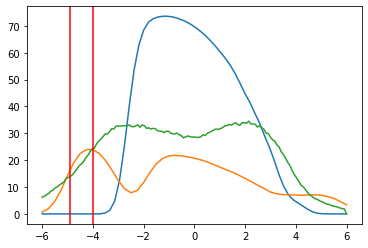

In [4]:
import matplotlib.pyplot as plt
from numpy import linspace

output = output.detach().numpy().flatten()

print(output)

len1 = linspace(-6, 6, 64)
len2 = linspace(-6, 6, len(output))
len3 = linspace(-6, 6, len(dataset[1][1]))

print(len(len2))

plt.plot(len1, dp.numpy().flatten())
plt.plot(len2, output)
plt.plot(len3, dataset[1][1])
plt.axvline(x=-4.9, color='red')
plt.axvline(x=-4., color='red')

In [5]:
from model import DEModel
from torch.utils.data import DataLoader
from torch.optim import Adamax

batch_size = 64

data = DataLoader(
    dataset=dataset,
    shuffle=True,
    batch_size=batch_size
)

model = DEModel()
loss_func = nn.MSELoss()
optim = Adamax(model.parameters(), lr=1e-4)

In [6]:
import utils
import numpy as np

epochs = 500

for epoch in range(epochs):
    for i, batch in enumerate(data):
        actual_batch_size = batch[1].shape[0]

        etas_start = dataset.start_eta
        etas_final = dataset.final_eta
        dE_deta_initial = batch[0].reshape(actual_batch_size,1, len(dataset.start_eta))
        dNch_deta_final = batch[1].reshape(actual_batch_size, 1, len(dataset.final_eta))

        optim.zero_grad()

        dNch_deta_final_trim = utils.trim( etas_final, dNch_deta_final, -4.9, -4.0)

        output = model(dE_deta_initial.float())

        print(output.size())
        print(dNch_deta_final_trim.size())

        loss = loss_func( output, dNch_deta_final_trim )

        loss.backward()
        optim.step()

        print(f"Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(dataset) // batch_size}], loss: {loss:.4f}")

Batch detected


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x49 and 42x9)